## Import Libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook


## Color Model Visualization

<IPython.core.display.Javascript object>


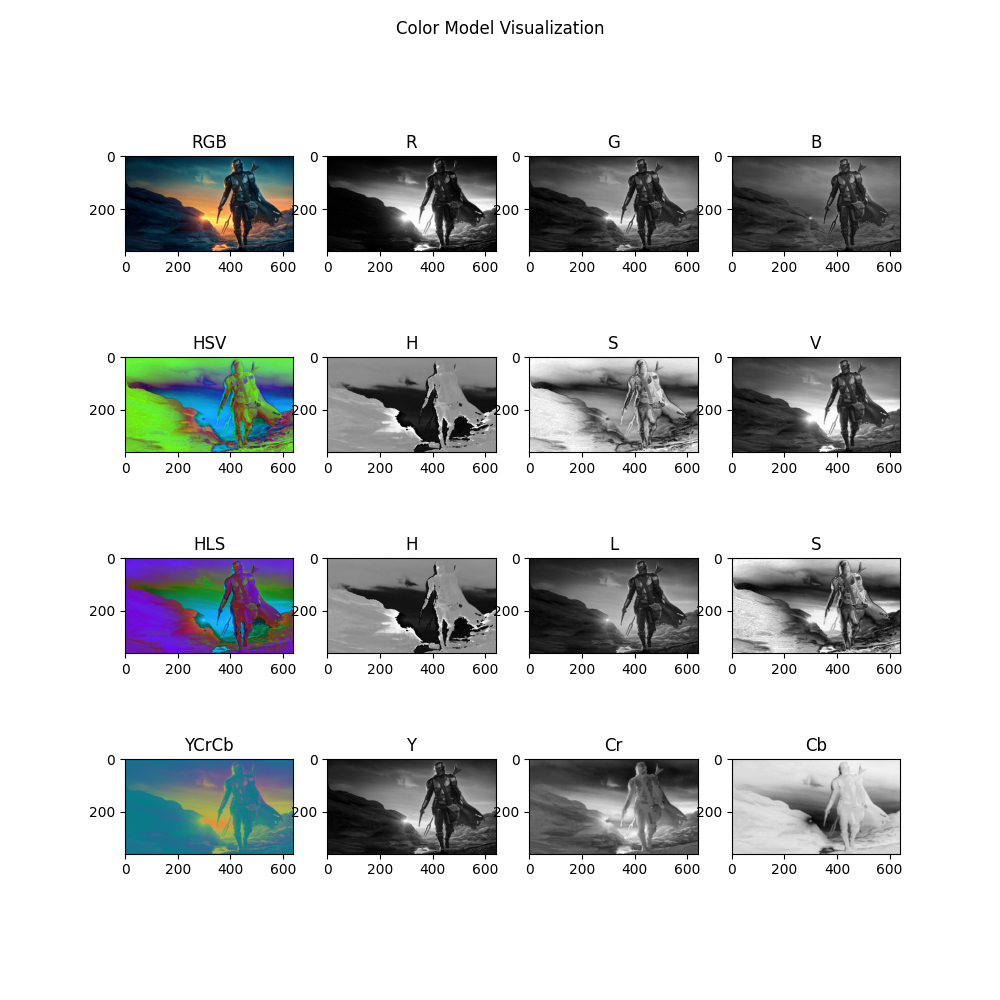

In [15]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Color Model Visualization")

rows = 4
columns = 4

#RGB
fig.add_subplot(rows, columns, 1)
rgb = plt.imread("./manda.jpg")
plt.imshow(rgb)
plt.title("RGB")
plt.show()

r,g,b = cv.split(rgb)

fig.add_subplot(rows, columns, 2)
plt.imshow(r, cmap='gray')
plt.title("R")
plt.show()

fig.add_subplot(rows, columns, 3)
plt.imshow(g, cmap='gray')
plt.title("G")
plt.show()

fig.add_subplot(rows, columns, 4)
plt.imshow(b, cmap='gray')
plt.title("B")
plt.show()

#HSV
fig.add_subplot(rows, columns, 5)
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.title("HSV")
plt.show()

h,s,v = cv.split(hsv)

fig.add_subplot(rows, columns, 6)
plt.imshow(h, cmap='gray')
plt.title("H")
plt.show()

fig.add_subplot(rows, columns, 7)
plt.imshow(s, cmap='gray')
plt.title("S")
plt.show()

fig.add_subplot(rows, columns, 8)
plt.imshow(v, cmap='gray')
plt.title("V")
plt.show()

#HLS
fig.add_subplot(rows, columns, 9)
hls = cv.cvtColor(rgb, cv.COLOR_RGB2HLS)
plt.imshow(hls)
plt.title("HLS")
plt.show()

h,l,s = cv.split(hls)

fig.add_subplot(rows, columns, 10)
plt.imshow(h, cmap='gray')
plt.title("H")
plt.show()

fig.add_subplot(rows, columns, 11)
plt.imshow(l, cmap='gray')
plt.title("L")
plt.show()

fig.add_subplot(rows, columns, 12)
plt.imshow(s, cmap='gray')
plt.title("S")
plt.show()

#YCrCb
fig.add_subplot(rows, columns, 13)
ycrcb = cv.cvtColor(rgb, cv.COLOR_RGB2YCrCb)
plt.imshow(ycrcb)
plt.title("YCrCb")
plt.show()

y,cr,cb = cv.split(ycrcb)

fig.add_subplot(rows, columns, 14)
plt.imshow(y, cmap='gray')
plt.title("Y")
plt.show()

fig.add_subplot(rows, columns, 15)
plt.imshow(cr, cmap='gray')
plt.title("Cr")
plt.show()

fig.add_subplot(rows, columns, 16)
plt.imshow(cb, cmap='gray')
plt.title("Cb")
plt.show()

## Image Addition

<IPython.core.display.Javascript object>


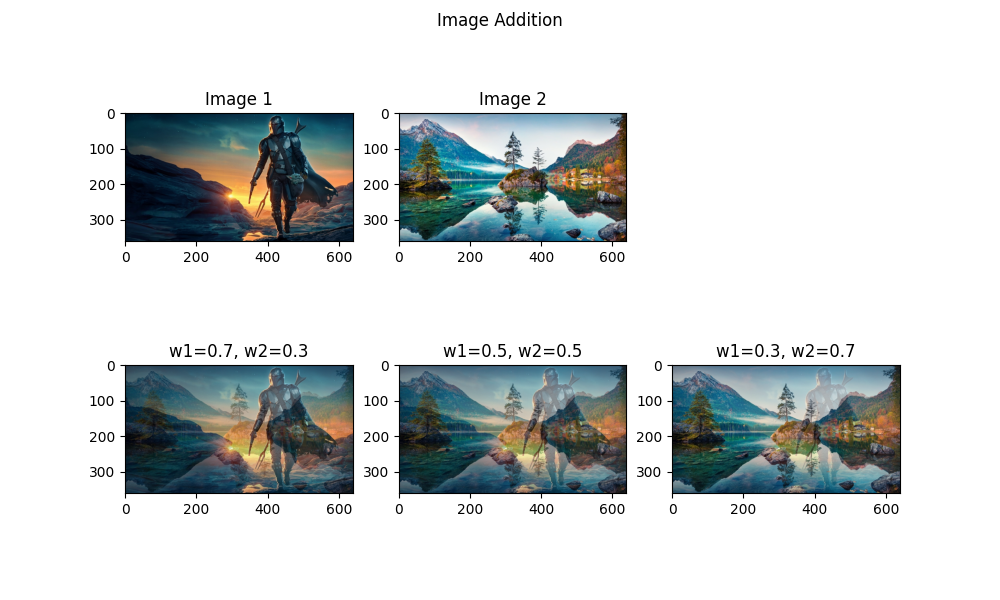

In [77]:
fig = plt.figure(figsize=(10,6))
fig.suptitle("Image Addition")

rows = 2
columns = 3

im1 = plt.imread('./manda.jpg')
im2 = plt.imread('./forest.jpeg')

#Image 1
fig.add_subplot(rows, columns, 1)
plt.imshow(im1)
plt.title("Image 1")
plt.show()

#Image 2
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)
plt.title("Image 2")
plt.show()

fig.add_subplot(rows, columns, 4)
im_addition = cv.addWeighted(im1, 0.7, im2, 0.3, .0)
plt.imshow(im_addition)
plt.title("w1=0.7, w2=0.3")
plt.show()

fig.add_subplot(rows, columns, 5)
im_addition = cv.addWeighted(im1, 0.5, im2, 0.5, 0.0)
plt.imshow(im_addition)
plt.title("w1=0.5, w2=0.5")
plt.show()

fig.add_subplot(rows, columns, 6)
im_addition = cv.addWeighted(im1, 0.3, im2, 0.7, 0.0)
plt.imshow(im_addition)
plt.title("w1=0.3, w2=0.7")
plt.show()

## Video Writer Object

In [71]:
im1 = cv.imread('./manda.jpg')
im2 = cv.imread('./forest.jpeg')

def image_addition(w1, w2):
    im_addition = cv.addWeighted(im1, w1, im2, w2, 0.0)
    return im_addition

width = 640
height = 360

#Initial video
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('image_addition_20fps.mp4',fourcc,10.0,(width,height))

w1 = 0
w2 = 1

#image1 to image2
for i in range(10):
    Image_addition = image_addition(w1, w2)
    out.write(Image_addition)
    w1 += 0.1
    w2 -= 0.1
    
#image2 to image1
for i in range(11):
    Image_addition = image_addition(w1, w2)
    out.write(Image_addition)
    w1 -= 0.1
    w2 += 0.1

out.release() 

## Image Bitwise AND operation

<IPython.core.display.Javascript object>


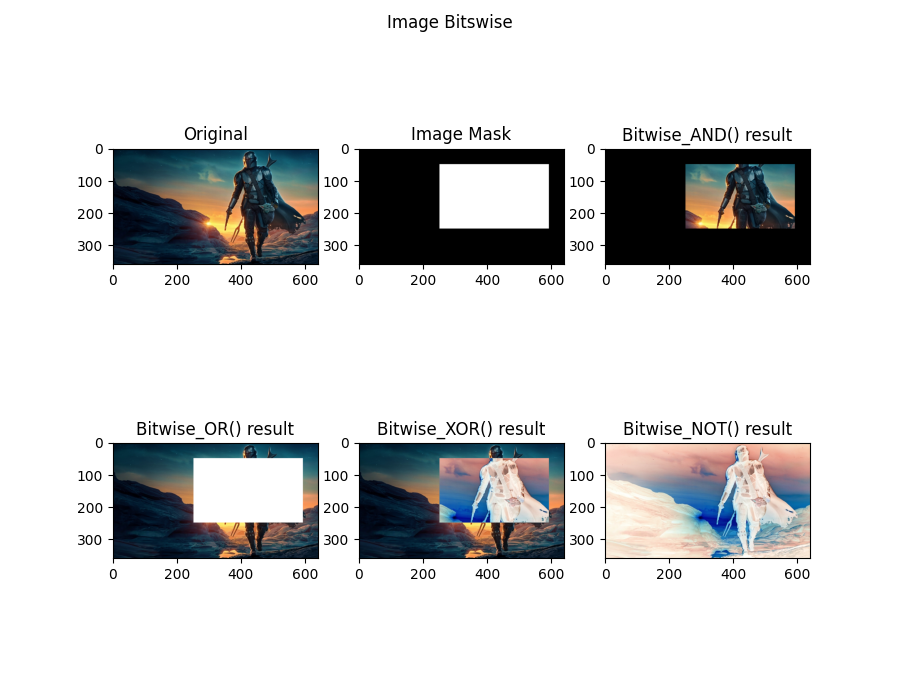

In [148]:
fig = plt.figure(figsize=(9,7))
fig.suptitle("Image Bitswise")

rows = 2
columns = 3

image = plt.imread('./manda.jpg')

#Original
fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.title("Original")
plt.show()

#Image Mask
fig.add_subplot(rows, columns, 2)
image_mask = np.zeros((360, 640, 3), dtype=np.uint8)

#Fill white in black
#X start 50:250, Y start 250:590, All channel
image_mask[50:250, 250:590, :] = [255 ,255 ,255]
plt.imshow(image_mask)
plt.title("Image Mask")
plt.show()

#Bitwise_AND() result
fig.add_subplot(rows, columns, 3)
bitwise = cv.bitwise_and(image, image_mask)
plt.imshow(bitwise)
plt.title("Bitwise_AND() result")
plt.show()

#Bitwise_OR() result
fig.add_subplot(rows, columns, 4)
bitwise = cv.bitwise_or(image, image_mask)
plt.imshow(bitwise)
plt.title("Bitwise_OR() result")
plt.show()

#Bitwise_XOR() result
fig.add_subplot(rows, columns, 5)
bitwise = cv.bitwise_xor(image, image_mask)
plt.imshow(bitwise)
plt.title("Bitwise_XOR() result")
plt.show()

#Bitwise_NOT() result
fig.add_subplot(rows, columns, 6)
bitwise = cv.bitwise_not(image)
plt.imshow(bitwise)
plt.title("Bitwise_NOT() result")
plt.show()